In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

In [1]:
#data reading
from google.colab import files
uplodes=files.upload()

Saving sorted_final.csv to sorted_final.csv


In [3]:
df=pd.read_csv('sorted_final.csv',index_col = 0)
def avg_temp(df):
  df['Average_temperature'] = df[['Max Temp', 'Min Temp']].mean(axis=1)
  return df


In [4]:
df = avg_temp(df)
df

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production,Amon_Area,Amon_Production,Boro_Area,Boro_Production,Average_temperature
0,Barisal,1970,29.849167,21.335000,201.083333,21.335000,1.373333,4.080833,4.080833,NaN,NaN,NaN,NaN,NaN,NaN,25.592083
1,Bhola,1970,29.835833,21.125000,172.833333,21.125000,2.446667,4.589167,4.589167,NaN,NaN,NaN,NaN,NaN,NaN,25.480417
2,Bogra,1970,30.431667,20.925833,149.500000,20.925833,1.027500,3.460833,3.460833,286080.000000,86400.2994,634460.0000,254832.8024,3.032000e+04,20574.9558,25.678750
3,Chandpur,1970,29.203333,22.090000,131.666667,22.090000,1.090833,2.110833,2.110833,NaN,NaN,NaN,NaN,NaN,NaN,25.646667
4,Chittagong,1970,29.751667,21.529167,235.666667,21.529167,2.470000,4.370833,4.370833,264775.000000,110195.7620,497290.0000,289460.0539,1.434810e+05,147662.5025,25.640417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,Srimongal,2018,30.827500,19.622500,182.166667,19.622500,1.327500,3.805833,3.805833,NaN,NaN,NaN,NaN,NaN,NaN,25.225000
1522,Syedpur,2018,30.352500,20.010000,124.416667,20.010000,2.434167,2.901667,2.901667,NaN,NaN,NaN,NaN,NaN,NaN,25.181250
1523,Sylhet,2018,30.565000,20.909167,298.416667,20.909167,1.669167,4.470833,4.470833,286754.109500,157383.0000,780480.1813,336260.0000,4.269926e+05,241039.0000,25.737083
1524,Tangail,2018,30.771667,20.838333,136.583333,20.838333,1.020833,3.353333,3.353333,7394.472692,1364.0000,773769.5904,250133.0000,1.025890e+06,840931.0000,25.805000


In [5]:
df = df.interpolate(method = 'linear', limit =2)
df_new = df.fillna(method = 'bfill',limit = 2)
df_new2 = df_new.fillna(method = 'ffill',limit =2)

In [6]:
#drop the missing value row
aus_features = df_new2[['Station Names','YEAR','Average_temperature','Rainfall','Relative Humidity','Wind Speed','Cloud Coverage','Bright Sunshine','Aus_Area','Aus_Production']]
amon_features = df_new2[['Station Names','YEAR','Average_temperature','Rainfall','Relative Humidity','Wind Speed','Cloud Coverage','Bright Sunshine','Amon_Area','Amon_Production']]
boro_features = df_new2[['Station Names','YEAR','Average_temperature','Rainfall','Relative Humidity','Wind Speed','Cloud Coverage','Bright Sunshine','Boro_Area','Boro_Production']]


In [ ]:
aus_features = aus_features.dropna()
aus_features.shape

(915, 10)

In [ ]:
amon_features = amon_features.dropna()
amon_features.shape

(917, 10)

In [ ]:
boro_features = boro_features.dropna()
boro_features.shape
#boro_features.to_csv("Boro.csv")

(914, 10)

In [ ]:
boro_features['Boro_Area'] = boro_features['Boro_Area'].astype(float)
boro_features['Boro_Production'] =  boro_features['Boro_Production'].astype(float)

In [7]:
x = aus_features.drop('Aus_Production',axis =1)
y = aus_features['Aus_Production']
x_amon = amon_features.drop('Amon_Production',axis =1)
y_amon = amon_features['Amon_Production']
x_boro = boro_features.drop('Boro_Production',axis =1)
y_boro = boro_features['Boro_Production']

In [ ]:
df2=df.drop(['Amon_area','Amon_production','Jute_area','Jute_production'],axis=1)

KeyError: ignored

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 23)
x_amon_train, x_amon_test, y_amon_train, y_amon_test = train_test_split(x_amon, y_amon, test_size = 0.20, random_state = 23)
x_boro_train, x_boro_test, y_boro_train, y_boro_test = train_test_split(x_boro, y_boro, test_size = 0.20, random_state = 23)

In [9]:
# convert categorical value into numerical value
le = LabelEncoder()
x_train['Station Names'] = le.fit_transform(x_train[['Station Names']])
x_test['Station Names'] = le.fit_transform(x_test[['Station Names']])
x_amon_train['Station Names'] = le.fit_transform(x_amon_train[['Station Names']])
x_amon_test['Station Names'] = le.fit_transform(x_amon_test[['Station Names']])
x_boro_train['Station Names'] = le.fit_transform(x_boro_train[['Station Names']])
x_boro_test['Station Names'] = le.fit_transform(x_boro_test[['Station Names']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
x_train.isnull().sum()

Station Names          0
YEAR                   0
Average_temperature    0
Rainfall               0
Relative Humidity      0
Wind Speed             0
Cloud Coverage         0
Bright Sunshine        0
Aus_Area               0
dtype: int64

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
predict_with_tree = tree.predict(x_test)
mse_tree = mean_squared_error(y_test, predict_with_tree)
mae_tree = mean_absolute_error(y_test, predict_with_tree)
print("mean squared error for tree= ",mse_tree)
print("mean absoluate error for tree= ",mae_tree)

mean squared error for tree=  527251549.27452904
mean absoluate error for tree=  14569.350045528221


In [12]:
from sklearn.metrics import r2_score
acc = r2_score(y_test, predict_with_tree)
print(acc*100)

87.35537246813985


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
tree = DecisionTreeRegressor()
tree.fit(x_amon_train, y_amon_train)
predict_with_tree = tree.predict(x_amon_test)
mse_tree = mean_squared_error(y_amon_test, predict_with_tree)
rmse =np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_amon_test, predict_with_tree)
print("mean squared error for tree= ",mse_tree)
print("mean absoluate error for tree= ",mae_tree)
print("RMS= ",rmse)

from sklearn.metrics import r2_score
acc = r2_score(y_amon_test, predict_with_tree)
print(acc*100)

mean squared error for tree=  5275879909.179989
mean absoluate error for tree=  46788.69857005325
RMS=  72635.25252368844
85.00307925174533


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
tree = DecisionTreeRegressor()
tree.fit(x_boro_train, y_boro_train)
predict_with_tree = tree.predict(x_boro_test)
mse_tree = mean_squared_error(y_boro_test, predict_with_tree)
mae_tree = mean_absolute_error(y_boro_test, predict_with_tree)
print("mean squared error for tree= ",mse_tree)
print("mean absoluate error for tree= ",mae_tree)

from sklearn.metrics import r2_score
acc = r2_score(y_boro_test, predict_with_tree)
print(acc*100)

mean squared error for tree=  2534303390.358491
mean absoluate error for tree=  29466.633994563366
94.94191971677725


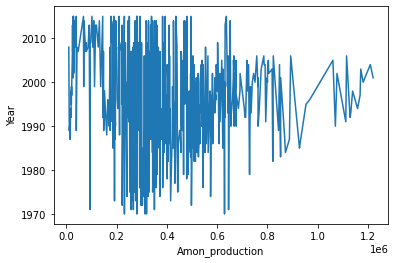

In [ ]:
sns.lineplot(x='Amon_production',y='Year',data=new_df)

In [ ]:
X = new_df.iloc[:,:10]
y = new_df['Amon_production']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
x_train

,Station,Year,max_temp,min_temp,humadity,Total Rainfall (mm),Cloud Coverage (Octs),Sunshine (Hours),Wind Speed (m/s),Amon_area
289,8,1986,31.221667,21.658333,75.423333,208.333333,3.842500,7.160000,0.937500,621540.0
1438,2,1975,30.845833,20.478333,74.348333,119.333333,2.926667,8.102500,1.155000,568865.0
1013,22,2004,30.615000,20.832500,80.272500,167.083333,3.484167,6.321667,0.695833,371510.0
1234,8,2013,30.955833,22.194167,71.240833,132.500000,3.737500,5.100000,1.084167,19079.0
1143,16,2008,30.819167,21.900000,84.258333,209.500000,3.536667,6.097500,0.655833,475465.0
...,...,...,...,...,...,...,...,...,...,...
332,13,1987,31.792500,21.286667,80.260833,160.166667,3.720000,7.092500,1.325833,1010110.0
442,15,1989,29.868333,20.550833,79.650833,191.666667,3.440000,6.135000,1.242500,509685.0
847,6,2000,30.269167,20.939167,82.565000,170.333333,3.863333,6.634167,1.168333,832240.0
1229,3,2013,30.964167,21.827500,80.018333,212.083333,3.923333,5.186667,1.171667,47187.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.score(x_train,y_train)

0.9895846598740784

In [ ]:
y_test_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_test_predict)
score

0.922609954479304

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x_train,y_train)

0.8811341996172588

In [ ]:
from google.colab import files
uplodes=files.upload()

Saving deleted_some.csv to deleted_some.csv


In [ ]:
import pandas as pd
df = pd.read_csv("deleted_some.csv",index_col=0)
df.dtypes

Station Names         object
YEAR                   int64
Max Temp             float64
Min Temp             float64
Rainfall             float64
Relative Humidity    float64
Wind Speed           float64
Cloud Coverage       float64
Bright Sunshine      float64
Aus_Area             float64
Aus_Production       float64
Amon_Area            float64
Amon_Production      float64
Boro_Area            float64
Boro_Production      float64
dtype: object